## **Aim:** To predict percentage of an student based on number of hours he study.
<br>

> #### **By:** Siddharth Kulkarni
> #### **Technique used:** Supervised ML - Linear Regression
> #### **Language used:** R

## **Loading Libraries & Importing Dataset**

In [1]:
library(readr)
library(dplyr)
library(ggplot2)

st_record = read_csv("../input/tsf-ds-ba-task-1/st_record.csv")
paste()
print("Dataset")
paste()
head(st_record)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



── Column specification ────────────────────────────────────────────────────────
cols(
  Hours = col_double(),
  Scores = col_double()
)




character(0)

[1] "Dataset"


character(0)

Hours,Scores
<dbl>,<dbl>
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20


## **Data Visuals** 
<br>

> #### **Plotting independent variable on x axis(hours) & dependent variable on y axis(scores)**

`geom_smooth()` using formula 'y ~ x'



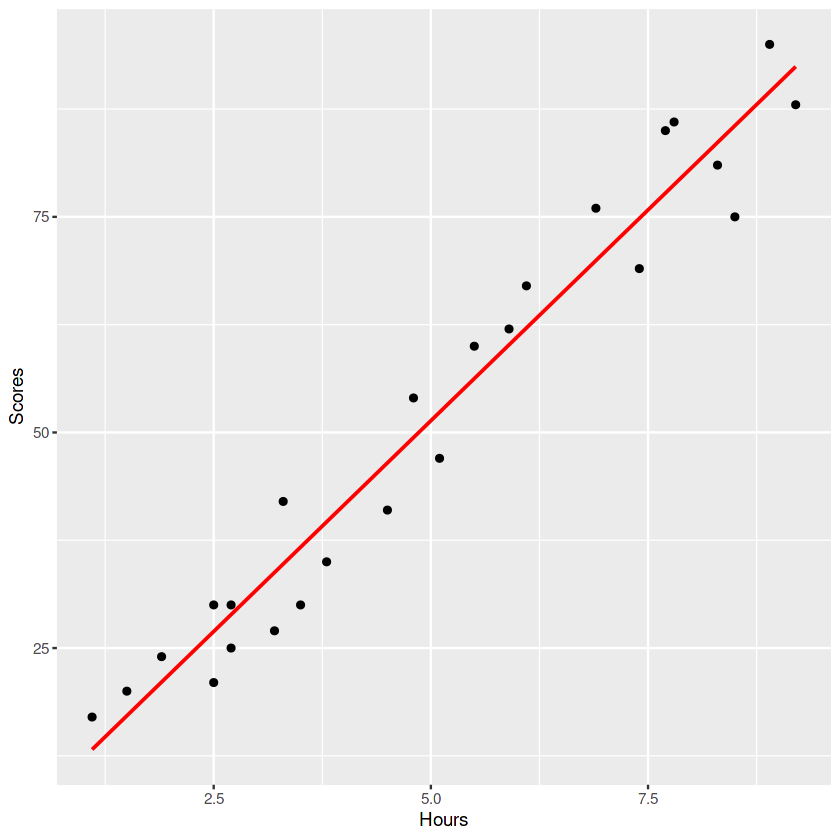

In [2]:
ggplot(data = st_record,aes(x = Hours,y = Scores)) + geom_point(colour = "black",size = 1.5) + geom_smooth(method = "lm",se = FALSE,colour = "red",size = 0.8)

> **We observe that there is a linear relationship between study hours and scores.**

> **The more you study the more you score!**

> **No outlier points in the data.**

## **Data Modeling** 
<br>

> #### **Linear Regression**

In [3]:
x = lm(Scores ~ Hours,data = st_record)
summary(x)


Call:
lm(formula = Scores ~ Hours, data = st_record)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
Hours         9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


> **R-square value: 0.95**

> **p-value < 2.2e-16**

## **Coefficient of Correlation (r)**

In [4]:
coef(x)

(Intercept)       Hours 
   2.483673    9.775803

## **Adding a column of Predicted values to the dataframe**

In [5]:
st_record = st_record %>% mutate(Predicted_Scores = fitted(x))
head(st_record)

Hours,Scores,Predicted_Scores
<dbl>,<dbl>,<dbl>
2.5,21,26.92318
5.1,47,52.34027
3.2,27,33.76624
8.5,75,85.57800
3.5,30,36.69899
1.5,20,17.14738


## **Predicted score if student studies for 9.25 hours**

In [6]:
st_score = coef(x)[[1]] + coef(x)[[2]] * 9.25
st_score

[1] 92.90985

## **Status of Students based on their Scores**

In [7]:
st_record = st_record %>% 
  mutate(Result_Status = case_when(Predicted_Scores < 35 ~ "Fail",
                            Predicted_Scores >= 35 & Predicted_Scores< 60 ~ "Pass",
                            Predicted_Scores >= 60 & Predicted_Scores < 85 ~ "First Class",
                            Predicted_Scores >= 85 ~ "Distinction"))
head(st_record)

Hours,Scores,Predicted_Scores,Result_Status
<dbl>,<dbl>,<dbl>,<chr>
2.5,21,26.92318,Fail
5.1,47,52.34027,Pass
3.2,27,33.76624,Fail
8.5,75,85.57800,Distinction
3.5,30,36.69899,Pass
1.5,20,17.14738,Fail


## **Conclusion**
<br>

> #### **Used linear regression and successfully predicted the score of student studying for 9.25 hrs & would score 92.90985 marks**